[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


Ticker                         051910.KS
Date                                    
2014-01-02 00:00:00+00:00  251791.968750
2014-01-03 00:00:00+00:00  246618.171875
2014-01-06 00:00:00+00:00  245324.718750
2014-01-07 00:00:00+00:00  239288.593750
2014-01-08 00:00:00+00:00  237132.859375
...                                  ...
2024-10-30 00:00:00+00:00  320500.000000
2024-10-31 00:00:00+00:00  313500.000000
2024-11-01 00:00:00+00:00  318000.000000
2024-11-04 00:00:00+00:00  323500.000000
2024-11-05 00:00:00+00:00  322000.000000

[2662 rows x 1 columns]
Ticker                         096770.KS
Date                                    
2014-01-02 00:00:00+00:00  110253.320312
2014-01-03 00:00:00+00:00  109072.023438
2014-01-06 00:00:00+00:00  108284.492188
2014-01-07 00:00:00+00:00  106709.453125
2014-01-08 00:00:00+00:00  105134.414062
...                                  ...
2024-10-30 00:00:00+00:00  118800.000000
2024-10-31 00:00:00+00:00  117400.000000
2024-11-01 00:00:00+00:00  12180

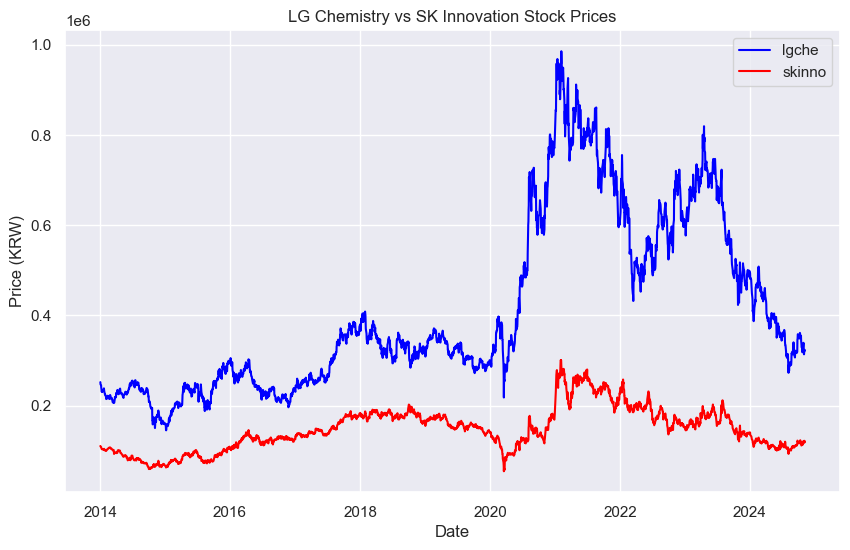

In [7]:
#import yfinance as yf
#import pandas as pd
#import matplotlib.pyplot as plt
from my_imports import *
# LG화학과 SK이노베이션의 주가 데이터를 가져오기
start_date = '2014-01-01'  # 시작 날짜 설정
end_date = '2024-11-06'    # 종료 날짜 설정

lgche = yf.download('051910.KS', start=start_date, end=end_date)['Adj Close']
skinno = yf.download('096770.KS', start=start_date, end=end_date)['Adj Close']

data = pd.concat([lgche, skinno], axis=1)

    # 결측치 제거
data.dropna(inplace=True)
    # 상관관계 계산
correlation = data.corr().iloc[0, 1]
print(lgche)
print(skinno)
    # 상관관계 출력
print(f"LG화학과 SK이노베이션의 주가 상관관계: {correlation:.3f}")

    # 시각화
plt.figure(figsize=(10, 6))
plt.plot(data['051910.KS'], label='lgche', color='blue')
plt.plot(data['096770.KS'], label='skinno', color='red')
plt.title("LG Chemistry vs SK Innovation Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (KRW)")
plt.legend()
plt.show()
